# Week 6 - Linear Regression (gapminder)

In [2]:
# Clear the workspace
rm(list=ls())

# Load the relevant packages
library('gapminder')
library('tidyverse')
library('gridExtra')

In [3]:
data(gapminder)
attach(gapminder)
glimpse(gapminder)
summary(gapminder)

Observations: 1,704
Variables: 6
$ country   <fct> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgha...
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asi...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

## Data Visualisation

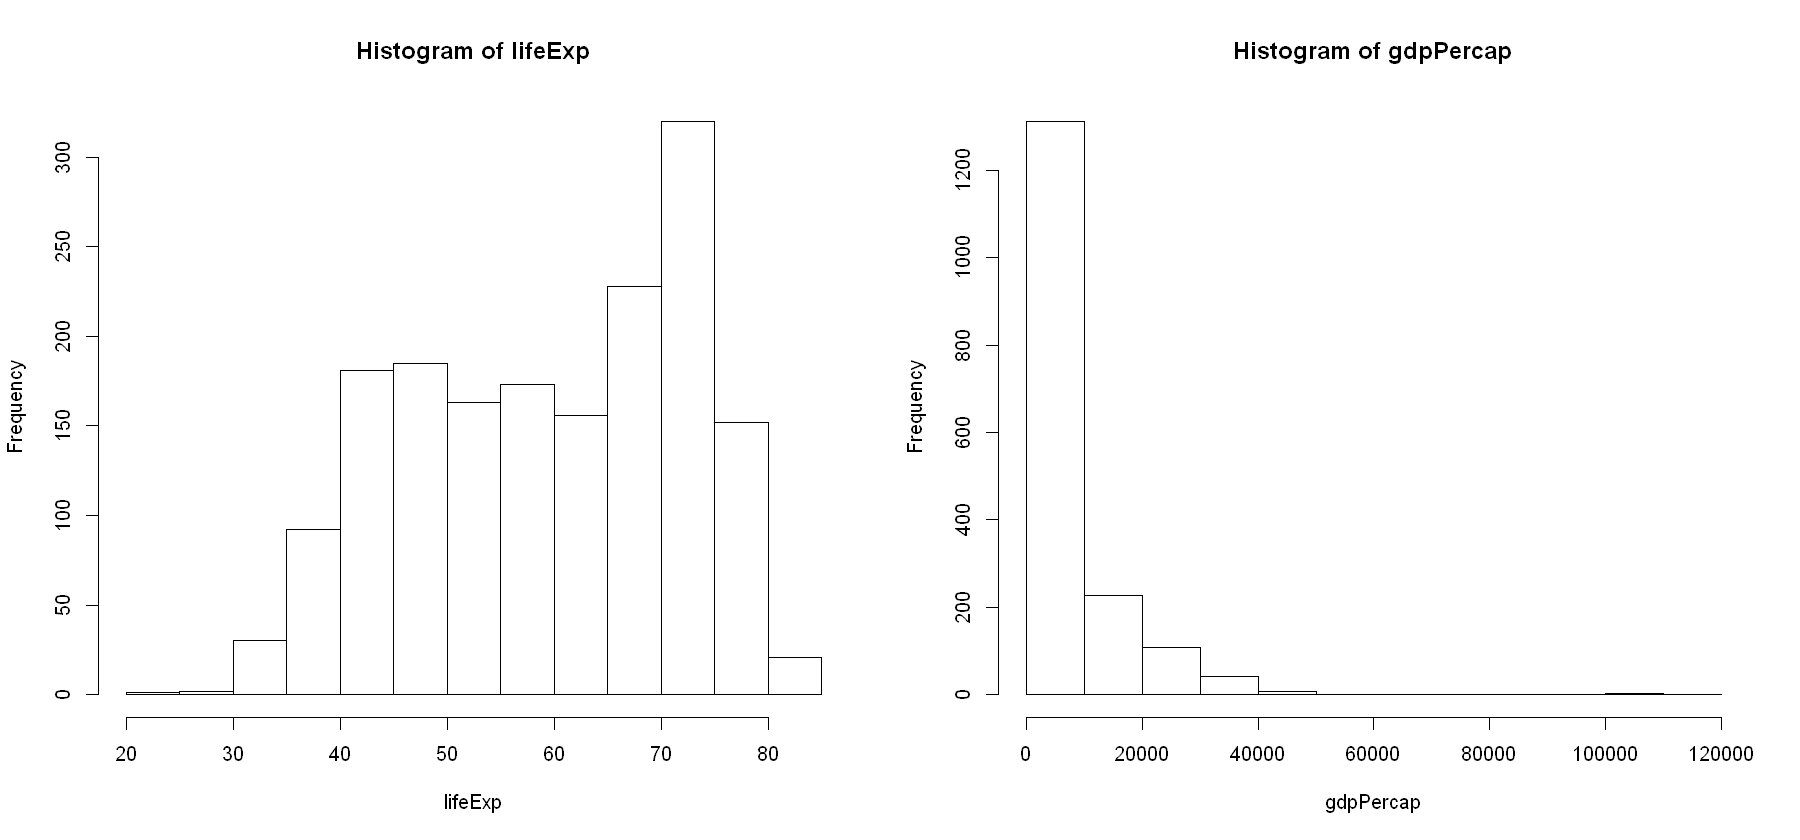

In [4]:
options(repr.plot.heigth=7, repr.plot.width=15)
par(mfrow=c(1,2))
hist(lifeExp)
hist(gdpPercap)

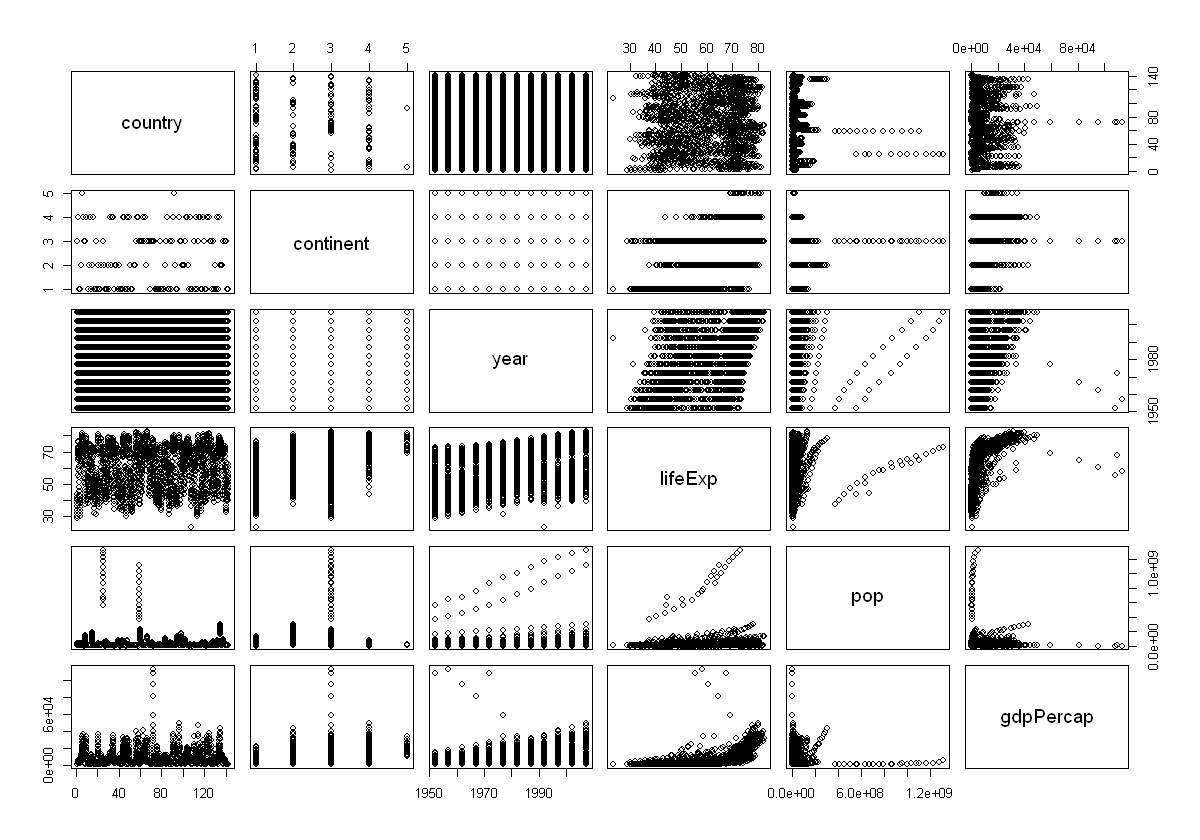

In [5]:
options(repr.plot.heigth=10, repr.plot.width=10)
plot(gapminder)

## Model 1


Call:
lm(formula = lifeExp ~ gdpPercap, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.754  -7.758   2.176   8.225  18.426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.396e+01  3.150e-01  171.29   <2e-16 ***
gdpPercap   7.649e-04  2.579e-05   29.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.49 on 1702 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.3403 
F-statistic: 879.6 on 1 and 1702 DF,  p-value: < 2.2e-16


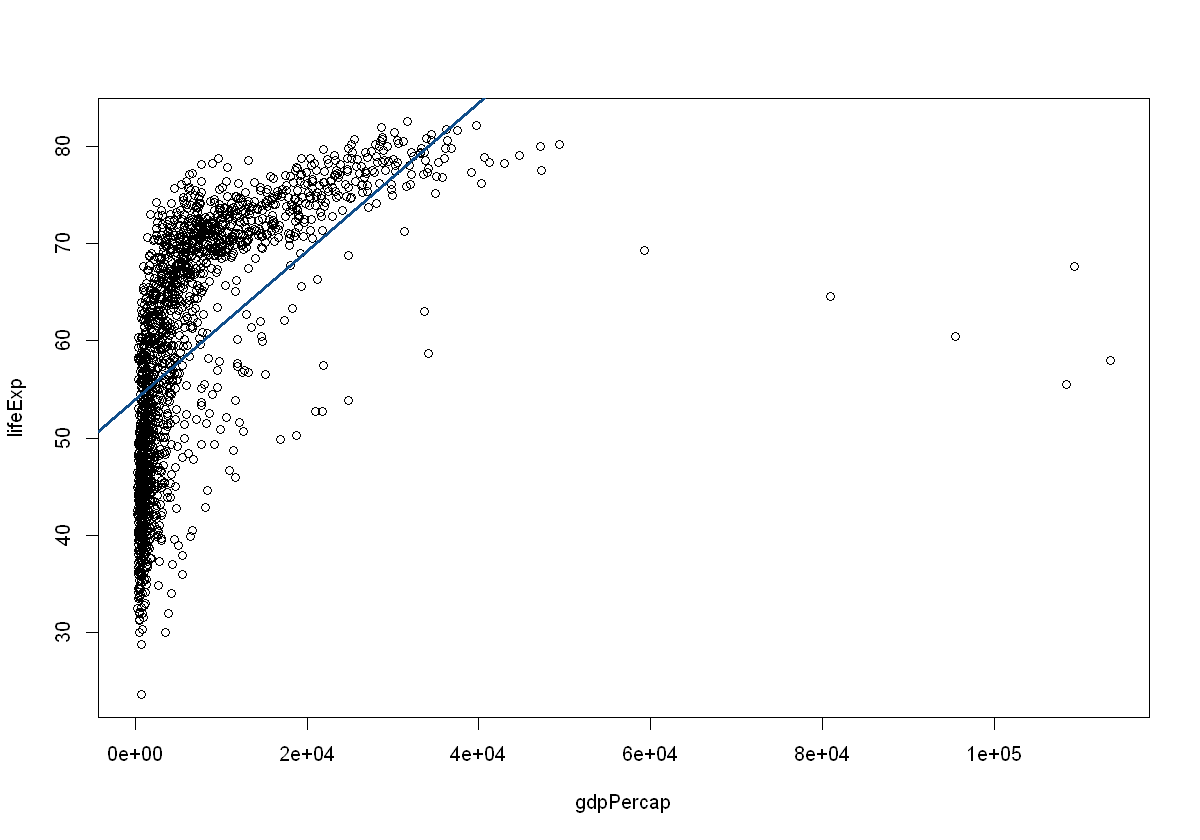

In [6]:
model1 <- lm(lifeExp ~ gdpPercap, data=gapminder)
summary(model1)

plot(gdpPercap, lifeExp)
abline(model1, col='dodgerblue4', lwd=3)

## Model 2


Call:
lm(formula = lifeExp ~ poly(gdpPercap, 3), data = gapminder)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.0491  -4.9994   0.1297   5.8643  26.2220 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           59.4744     0.1977  300.84   <2e-16 ***
poly(gdpPercap, 3)1  311.1479     8.1607   38.13   <2e-16 ***
poly(gdpPercap, 3)2 -230.3180     8.1607  -28.22   <2e-16 ***
poly(gdpPercap, 3)3  145.1669     8.1607   17.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.161 on 1700 degrees of freedom
Multiple R-squared:  0.6016,	Adjusted R-squared:  0.6009 
F-statistic: 855.6 on 3 and 1700 DF,  p-value: < 2.2e-16


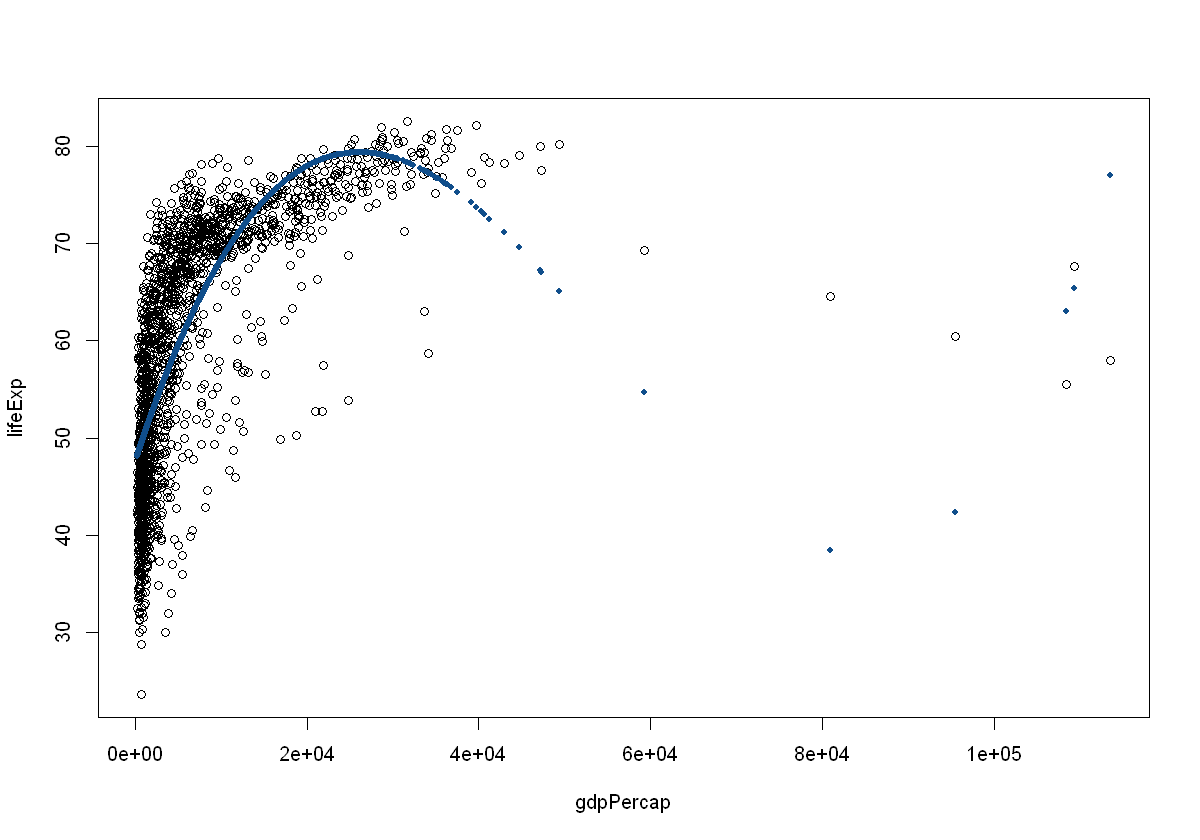

In [7]:
model2 <- lm(lifeExp ~ poly(gdpPercap, 3), data=gapminder)
summary(model2)

plot(gdpPercap, lifeExp)
points(gdpPercap, fitted(model2), col='dodgerblue4', pch=20)

## Model 3


Call:
lm(formula = lifeExp ~ poly(gdpPercap, 2) + log(gdpPercap), data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.805  -4.043   1.081   4.339  19.970 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -12.3706     2.7101  -4.565 5.36e-06 ***
poly(gdpPercap, 2)1 -48.6939    15.4674  -3.148  0.00167 ** 
poly(gdpPercap, 2)2 -44.4651    10.2345  -4.345 1.48e-05 ***
log(gdpPercap)        8.8058     0.3314  26.569  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.471 on 1700 degrees of freedom
Multiple R-squared:  0.6661,	Adjusted R-squared:  0.6655 
F-statistic:  1130 on 3 and 1700 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-17.686050,-7.055102
"poly(gdpPercap, 2)1",-79.031067,-18.356771
"poly(gdpPercap, 2)2",-64.538656,-24.391469
log(gdpPercap),8.155793,9.455890


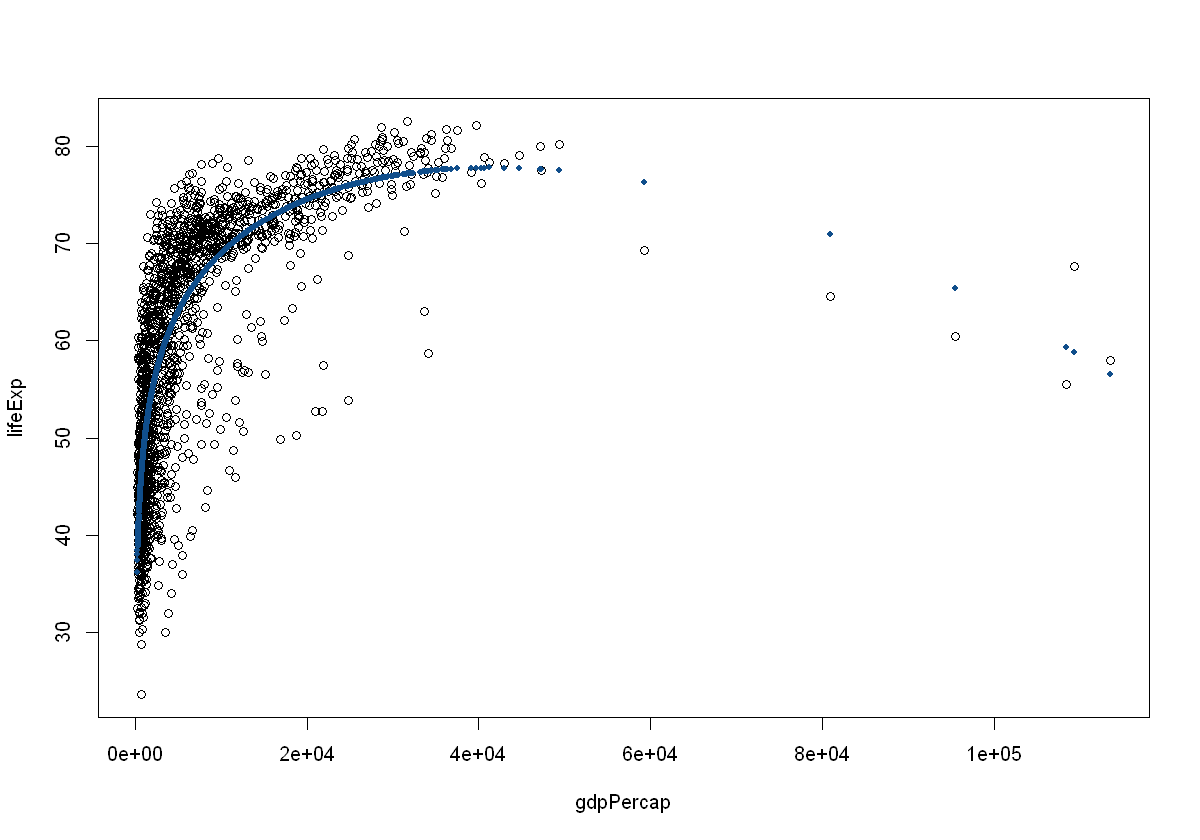

In [8]:
model3 <- lm(lifeExp ~ poly(gdpPercap, 2) + log(gdpPercap), data=gapminder)
summary(model3)

confint(model3)

plot(gdpPercap, lifeExp)
points(gdpPercap, fitted(model3), col='dodgerblue4', pch=20)

## Confidence Bands

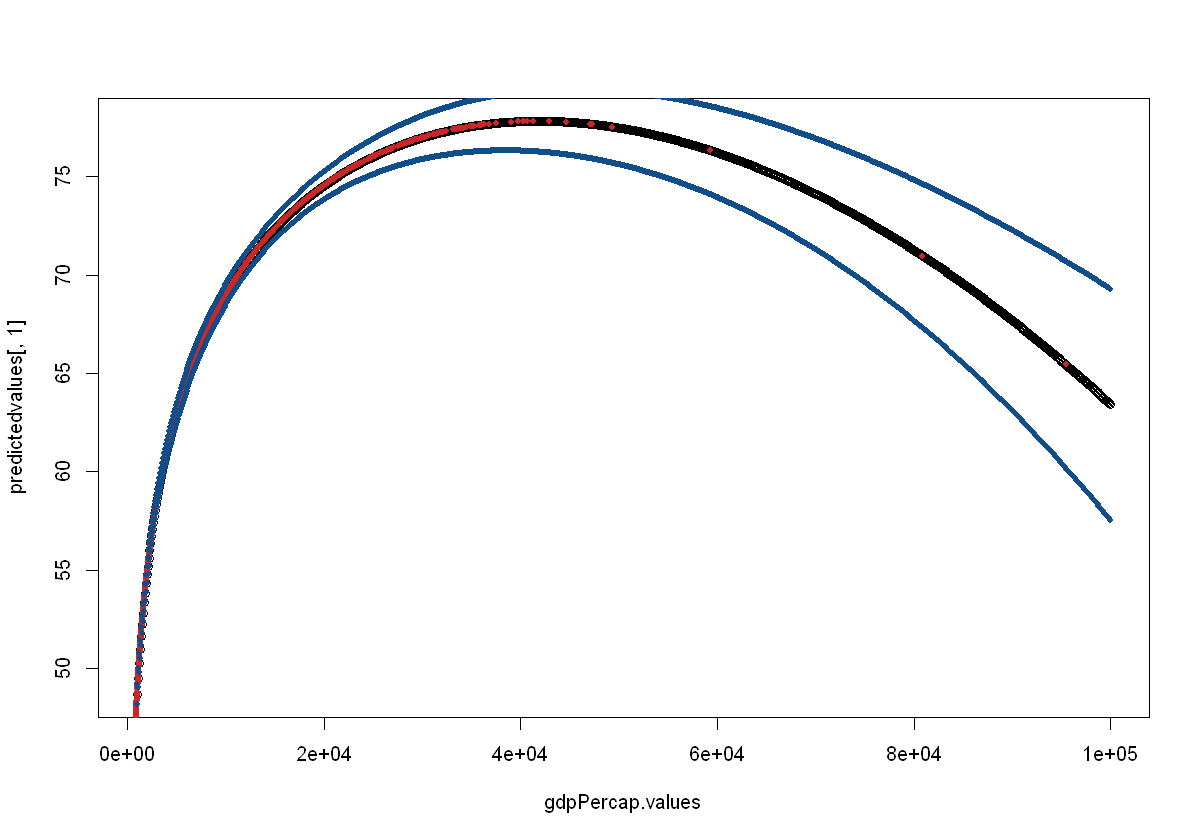

In [9]:
gdpPercap.values <- seq(1000, 100000, length=1000)
predictedvalues <- predict(model3, data.frame(gdpPercap=gdpPercap.values), interval='confidence')

# Predicted values based on the gdpPercap.values chosen
plot(gdpPercap.values, predictedvalues[,1])

# Actual values
points(gdpPercap, fitted(model3), col='firebrick3', pch=20) 

# Confidence band
points(gdpPercap.values, predictedvalues[,2], col='dodgerblue4', pch=20) 
points(gdpPercap.values, predictedvalues[,3], col='dodgerblue4', pch=20) 

## Model 4


Call:
lm(formula = lifeExp ~ year + I(year^2) + continent + gdpPercap + 
    I(gdpPercap^2) + pop + I(pop^2) + log(gdpPercap), data = gapminder)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.6784  -2.8581   0.3137   3.5159  15.3496 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8.226e+03  2.052e+03  -4.009 6.37e-05 ***
year               8.071e+00  2.073e+00   3.893 0.000103 ***
I(year^2)         -1.977e-03  5.237e-04  -3.776 0.000165 ***
continentAmericas  7.891e+00  4.732e-01  16.676  < 2e-16 ***
continentAsia      6.637e+00  4.061e-01  16.342  < 2e-16 ***
continentEurope    1.205e+01  5.083e-01  23.697  < 2e-16 ***
continentOceania   1.263e+01  1.251e+00  10.091  < 2e-16 ***
gdpPercap         -2.406e-04  5.331e-05  -4.512 6.85e-06 ***
I(gdpPercap^2)     6.164e-10  5.365e-10   1.149 0.250692    
pop                6.567e-09  3.990e-09   1.646 0.099997 .  
I(pop^2)          -9.854e-19  3.905e-18  -0.252 0.800784    
log

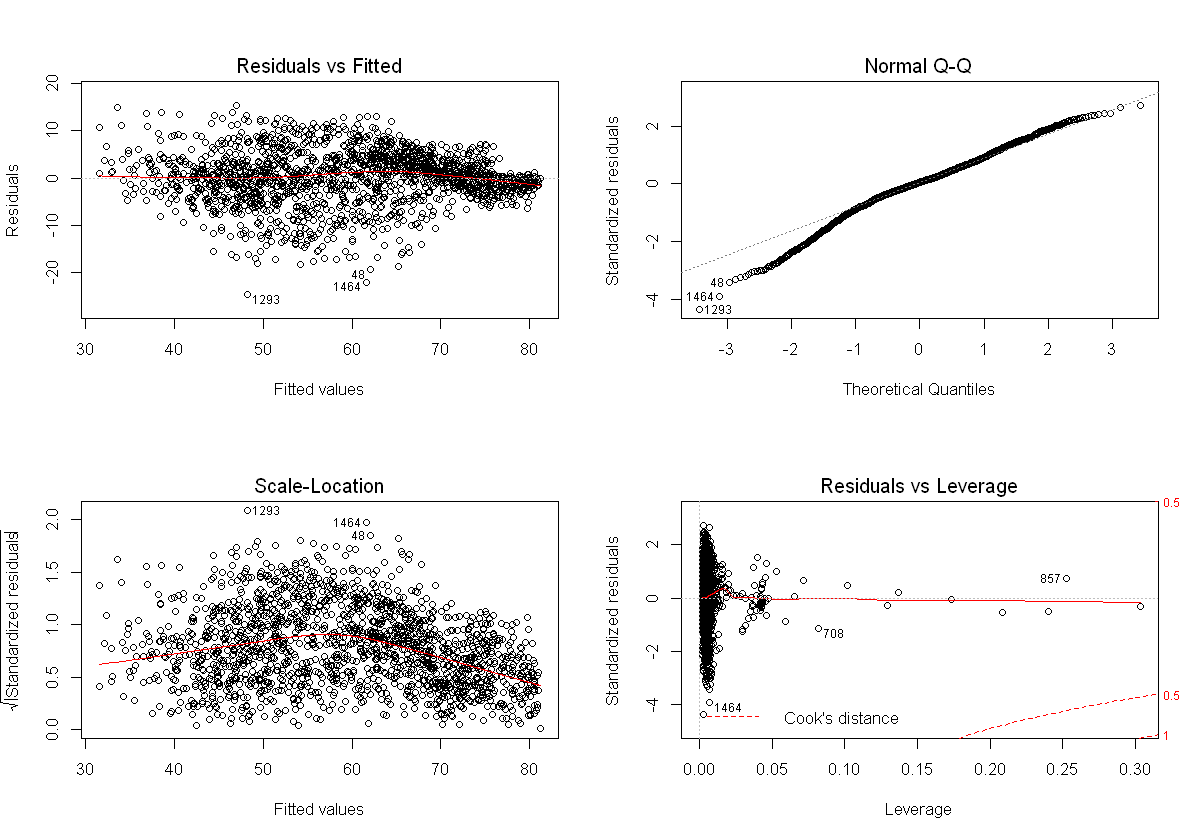

In [10]:
model4 <- lm(lifeExp ~ year + I(year^2) + continent + gdpPercap +
             I(gdpPercap^2) + pop + I(pop^2) + log(gdpPercap),
             data=gapminder)
summary(model4)

par(mfrow=c(2,2))
plot(model4)

## Model 5

We add `country` on top of model 4.


Call:
lm(formula = lifeExp ~ year + I(year^2) + country + continent + 
    gdpPercap + I(gdpPercap^2) + pop + I(pop^2) + log(gdpPercap), 
    data = gapminder)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.3587  -1.5385   0.0025   1.7998  10.1864 

Coefficients: (4 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -1.076e+04  1.213e+03  -8.868  < 2e-16 ***
year                             1.059e+01  1.225e+00   8.643  < 2e-16 ***
I(year^2)                       -2.603e-03  3.093e-04  -8.414  < 2e-16 ***
countryAlbania                   2.710e+01  1.400e+00  19.353  < 2e-16 ***
countryAlgeria                   1.591e+01  1.423e+00  11.176  < 2e-16 ***
countryAngola                   -4.046e+00  1.408e+00  -2.874 0.004111 ** 
countryArgentina                 2.418e+01  1.498e+00  16.146  < 2e-16 ***
countryAustralia                 3.116e+01  1.560e+00  19.977  < 2e-16 ***
coun

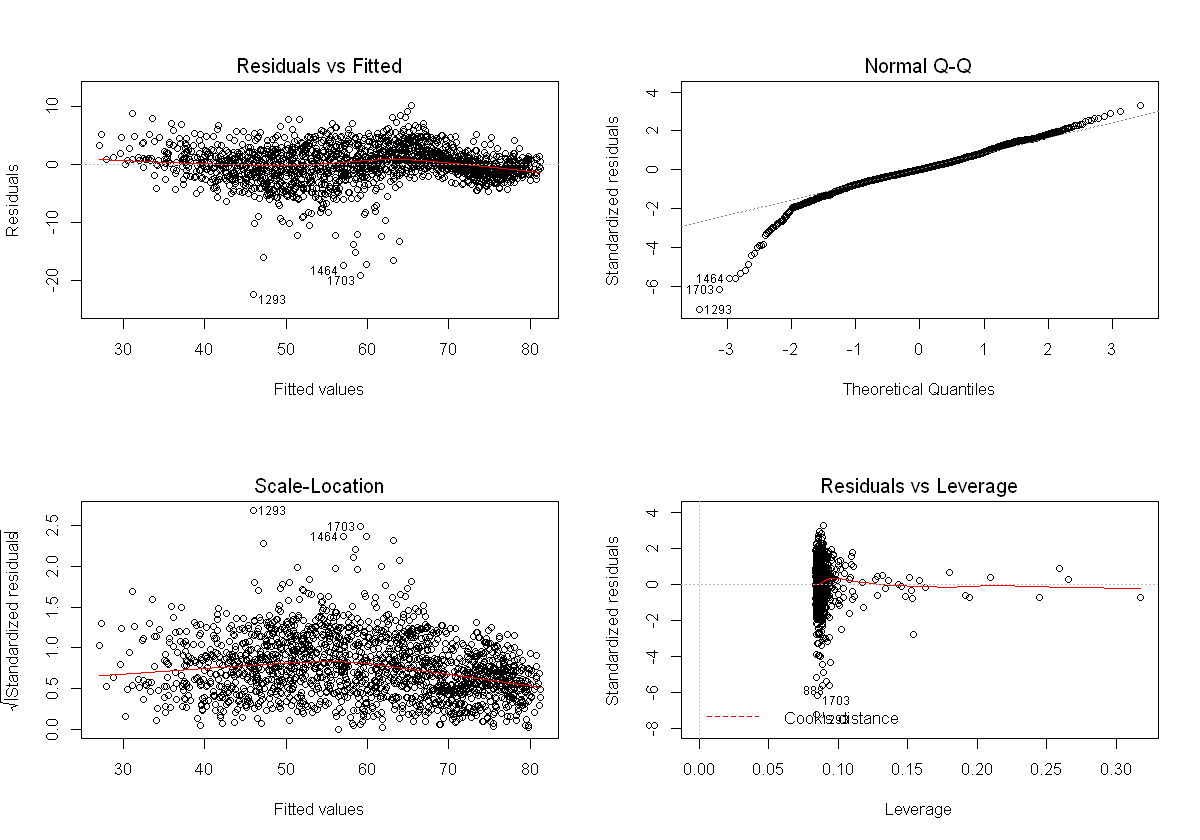

In [11]:
model5 <- lm(lifeExp ~ year + I(year^2) + country+ continent + gdpPercap +
             I(gdpPercap^2) + pop + I(pop^2) + log(gdpPercap),
             data=gapminder)
summary(model5)

par(mfrow=c(2,2))
plot(model5)